### Corrections
In previous submission hessian was used instead of jacobian which in turn made the model 'too sensitive' which resulted in overfitting. The corrected submission features jacobian matrix, as a result of which the curve has become more timid and smoother.

In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Generate random numbers alpha and beta
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Generate the noisy data
k = np.arange(101)
x = k / 100
delta = np.random.normal(0, 1, size=101)
y = alpha * x + beta + delta

# Define the linear and rational approximant functions
def linear_approximant(x, a, b):
    return a * x + b

def rational_approximant(x, a, b):
    return a / (1 + b * x)

# Define the objective function, jacobian and residuals
def objective_linear(params):
    a, b = params
    return np.sum((linear_approximant(x, a, b) - y) ** 2)

def jacobian_linear(params):
    a, b = params
    d_a = 2 * np.sum(x * (linear_approximant(x, a, b) - y))
    d_b = 2 * np.sum(linear_approximant(x, a, b) - y)
    return np.array([d_a, d_b])

def residuals_linear(params):
    a, b = params
    return linear_approximant(x, a, b) - y

def objective_rational(params):
    a, b = params
    return np.sum((rational_approximant(x, a, b) - y) ** 2)

def jacobian_rational(params):
    a, b = params
    d_a = 2 * np.sum(x / (1 + b * x) * (rational_approximant(x, a, b) - y))
    d_b = 2 * np.sum(-a * x**2 / (1 + b * x)**2 * (rational_approximant(x, a, b) - y))
    return np.array([d_a, d_b])

def residuals_rational(params):
    a, b = params
    return rational_approximant(x, a, b) - y

# Set initial guesses for parameters
initial_guess = np.array([np.random.uniform(0, 1), np.random.uniform(0, 1)])

# Set optimization tolerance
epsilon = 0.001

# Set other optimization parameters
learning_rate = 0.01
max_iterations = 1000



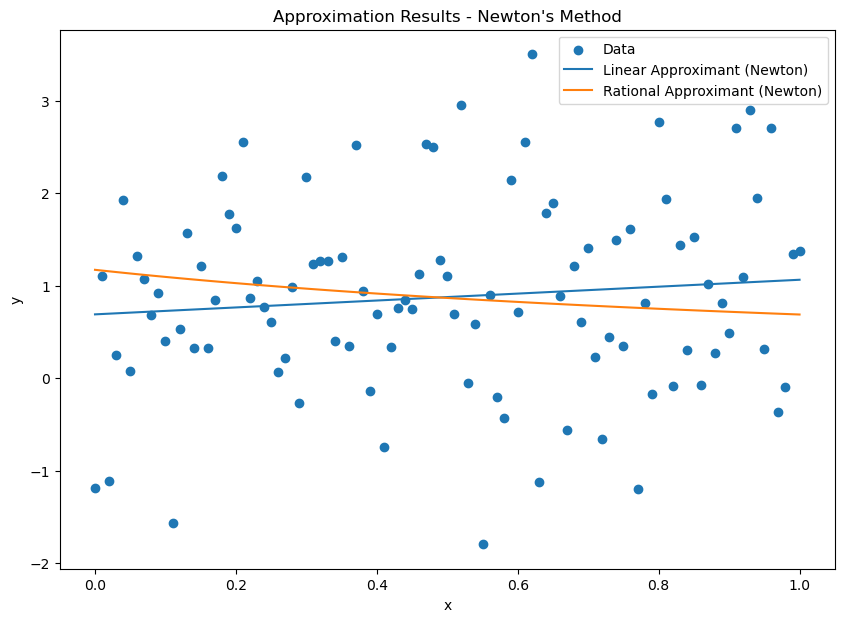

In [14]:
# Perform the optimization using Newton-CG method for linear approximant
result_linear_newton = optimize.minimize(
    objective_linear, initial_guess, method='Newton-CG', tol=epsilon, jac=jacobian_linear
)

# Extract the optimized parameters for linear approximant
a_linear_newton, b_linear_newton = result_linear_newton.x

# Perform the optimization using Newton-CG method for rational approximant
result_rational_newton = optimize.minimize(
    objective_rational, initial_guess, method='Newton-CG', tol=epsilon, jac=jacobian_rational
)

# Extract the optimized parameters for rational approximant
a_rational_newton, b_rational_newton = result_rational_newton.x

# Visualize the data and the approximants obtained using Newton's method
plt.figure(figsize=(10, 7))

# Plot the data
plt.scatter(x, y, label='Data')

# Plot the linear approximant obtained using Newton's method
plt.plot(x, linear_approximant(x, a_linear_newton, b_linear_newton), label='Linear Approximant (Newton)')

# Plot the rational approximant obtained using Newton's method
plt.plot(x, rational_approximant(x, a_rational_newton, b_rational_newton), label='Rational Approximant (Newton)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Approximation Results - Newton's Method")
plt.show()